In [41]:
# Manipulação de dados:

import pandas as pd
import numpy  as np

# Visualização de dados:
import matplotlib.pyplot as plt
import seaborn           as sns

# sklearn - conjuntos de dados pré feitos:
from sklearn.datasets import fetch_openml

# Divisão em treino em teste:
from sklearn.model_selection import train_test_split

# Modelo linear:
from sklearn.linear_model import SGDClassifier

# Cross Validation:
from sklearn.model_selection import cross_val_score

# Métrivas
# Métricas
from sklearn.metrics import confusion_matrix, precision_score, recall_score, classification_report

#
from sklearn.model_selection import cross_val_predict


In [2]:
mnist = fetch_openml('mnist_784', version = 1)

In [3]:
# visualizando o formato do conjunto de dados:
print(mnist)


{'data':        pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  pixel9  \
0           0       0       0       0       0       0       0       0       0   
1           0       0       0       0       0       0       0       0       0   
2           0       0       0       0       0       0       0       0       0   
3           0       0       0       0       0       0       0       0       0   
4           0       0       0       0       0       0       0       0       0   
...       ...     ...     ...     ...     ...     ...     ...     ...     ...   
69995       0       0       0       0       0       0       0       0       0   
69996       0       0       0       0       0       0       0       0       0   
69997       0       0       0       0       0       0       0       0       0   
69998       0       0       0       0       0       0       0       0       0   
69999       0       0       0       0       0       0       0       0       0   

       pixel10  ..

In [4]:
# verificando o tipo do conjunto de dados:
print(type(mnist))

<class 'sklearn.utils._bunch.Bunch'>


In [5]:
mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [6]:
mnist('DESCR')

TypeError: 'Bunch' object is not callable

In [9]:
# Separando X e y:
# Transformando em vetor numpy
X, y = mnist["data"].values, mnist["target"].values

# Verificando o tipo de dado de y:
print('tipo do dado em y: ', y.dtype)

# Transformando y para float
y = y.astype(np.float32)

tipo do dado em y:  category


In [10]:
X

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [11]:
y

array([5., 0., 4., ..., 4., 5., 6.], dtype=float32)

0.0


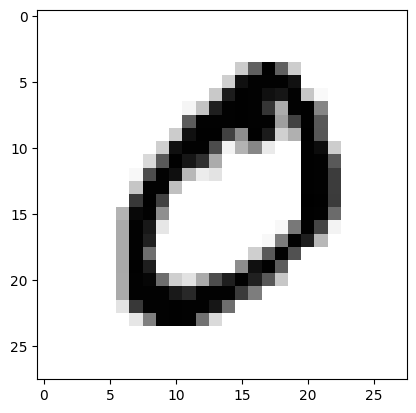

In [12]:
n = 1
plt.imshow(X[n].reshape(28, 28), cmap = "binary")
print(y[n])
plt.show()

## Classificador binário

In [13]:
# Montando um classificador binário
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size = 0.3,
                                                    random_state = 42)

In [14]:
X_train.shape

(49000, 784)

In [15]:
y_train

array([0., 4., 4., ..., 1., 0., 0.], dtype=float32)

In [16]:
y_train_7 = (y_train == 7)
y_train_7

array([False, False, False, ..., False, False, False])

In [17]:
# Verificando a quantidade de dados Falsos e verdadeiros para a classe 7:
print(pd.Series(y_train_7).value_counts())

# Verificando em percentual:
print(pd.Series(y_train_7).value_counts() / len(y_train_7) *100)



False    43955
True      5045
Name: count, dtype: int64
False    89.704082
True     10.295918
Name: count, dtype: float64


In [18]:
sgd_clf = SGDClassifier()
sgd_clf.fit(X_train, y_train_7)

SGDClassifier()

Classe real:  False
Classe predita pelo modelo:  [False]


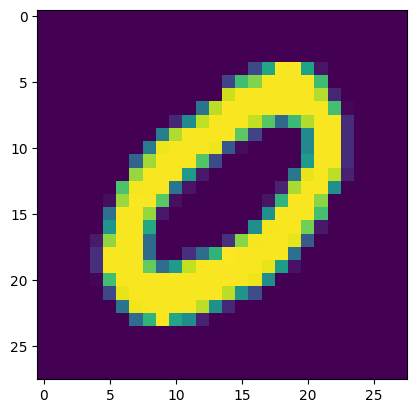

In [43]:
# Realizando uma pequena verificação do treinamento:
n = 0
plt.imshow(X_train[n].reshape(28, 28))

print("Classe real: ", y_train_7[n])
print("Classe predita pelo modelo: ", sgd_clf.predict([X_train[n]]))

In [20]:
# Medindo a acurácia do modelo binário:
cross_val_score(sgd_clf, X_train, y_train_7, cv = 3, scoring = "accuracy")

array([0.9802253 , 0.96657075, 0.98212208])

In [23]:
from sklearn.base import BaseEstimator

class Never7Classifier(BaseEstimator):
    def fit(self, X, y = None):
        pass
    def predict(self, X):
        return np.zeros((len(X), 1), dtype = bool)

In [24]:
never_7_clf = Never7Classifier()
cross_val_score(never_7_clf, X_train, y_train_7, cv = 3, scoring="accuracy")

array([0.89537162, 0.89799792, 0.89775302])

Isso pode acontecer por que a proporção dos valores nas classes não são iguais
Eu não tenho uma proporção de valores 7 iguais aos que não são 7

In [26]:
confusion_matrix(y_train_7, sgd_clf.predict(X_train))

array([[43831,   124],
       [ 1164,  3881]], dtype=int64)

In [30]:
print("Precisão: ", precision_score(y_train_7, sgd_clf.predict(X_train)))
print("Recall: ",   recall_score(y_train_7, sgd_clf.predict(X_train)))

Precisão:  0.9690387016229712
Recall:  0.7692765113974231


In [33]:
print(classification_report(y_train_7, sgd_clf.predict(X_train)))
confusion_matrix(y_train_7, sgd_clf.predict(X_train))

              precision    recall  f1-score   support

       False       0.97      1.00      0.99     43955
        True       0.97      0.77      0.86      5045

    accuracy                           0.97     49000
   macro avg       0.97      0.88      0.92     49000
weighted avg       0.97      0.97      0.97     49000



array([[43831,   124],
       [ 1164,  3881]], dtype=int64)

## Modelo MultiClasses

In [34]:
sgd_clf.fit(X_train, y_train)

SGDClassifier()

[8.]


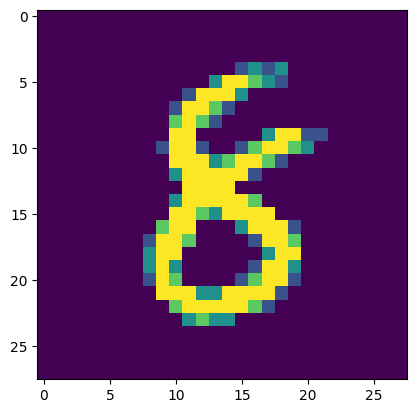

In [39]:
n = 8

digit = X_train[n]
print(sgd_clf.predict([digit]))
plt.imshow(digit.reshape(28, 28))

In [42]:
y_train_pred = cross_val_predict(sgd_clf, X_train, y_train, cv = 3)

In [44]:
conf_mx = confusion_matrix(y_train, sgd_clf.predict(X_train))
print(conf_mx)
print(classification_report(y_train, sgd_clf.predict(X_train)))


[[4532    0   23   18    9   15  155   28   59    6]
 [   1 5309   33   20    3   11   29   24   82    1]
 [   7   12 4224   64   44   14  151  168  149   24]
 [   8    8   85 4378   10  141   68  137  101   29]
 [   2   22   20    8 4422    1   73  188   44  108]
 [  15   12   18  168   68 3514  224   78  258   43]
 [   5    2   16    2    8   33 4697    6   17    2]
 [   3    9   12    7    9    0    9 4950   15   31]
 [   6   40   49  186   39  116   99  124 4135   39]
 [   7   16    4   61  229   39   10 1287   47 3168]]
              precision    recall  f1-score   support

         0.0       0.99      0.94      0.96      4845
         1.0       0.98      0.96      0.97      5513
         2.0       0.94      0.87      0.90      4857
         3.0       0.89      0.88      0.89      4965
         4.0       0.91      0.90      0.91      4888
         5.0       0.90      0.80      0.85      4398
         6.0       0.85      0.98      0.91      4788
         7.0       0.71      0.98   

<Axes: >

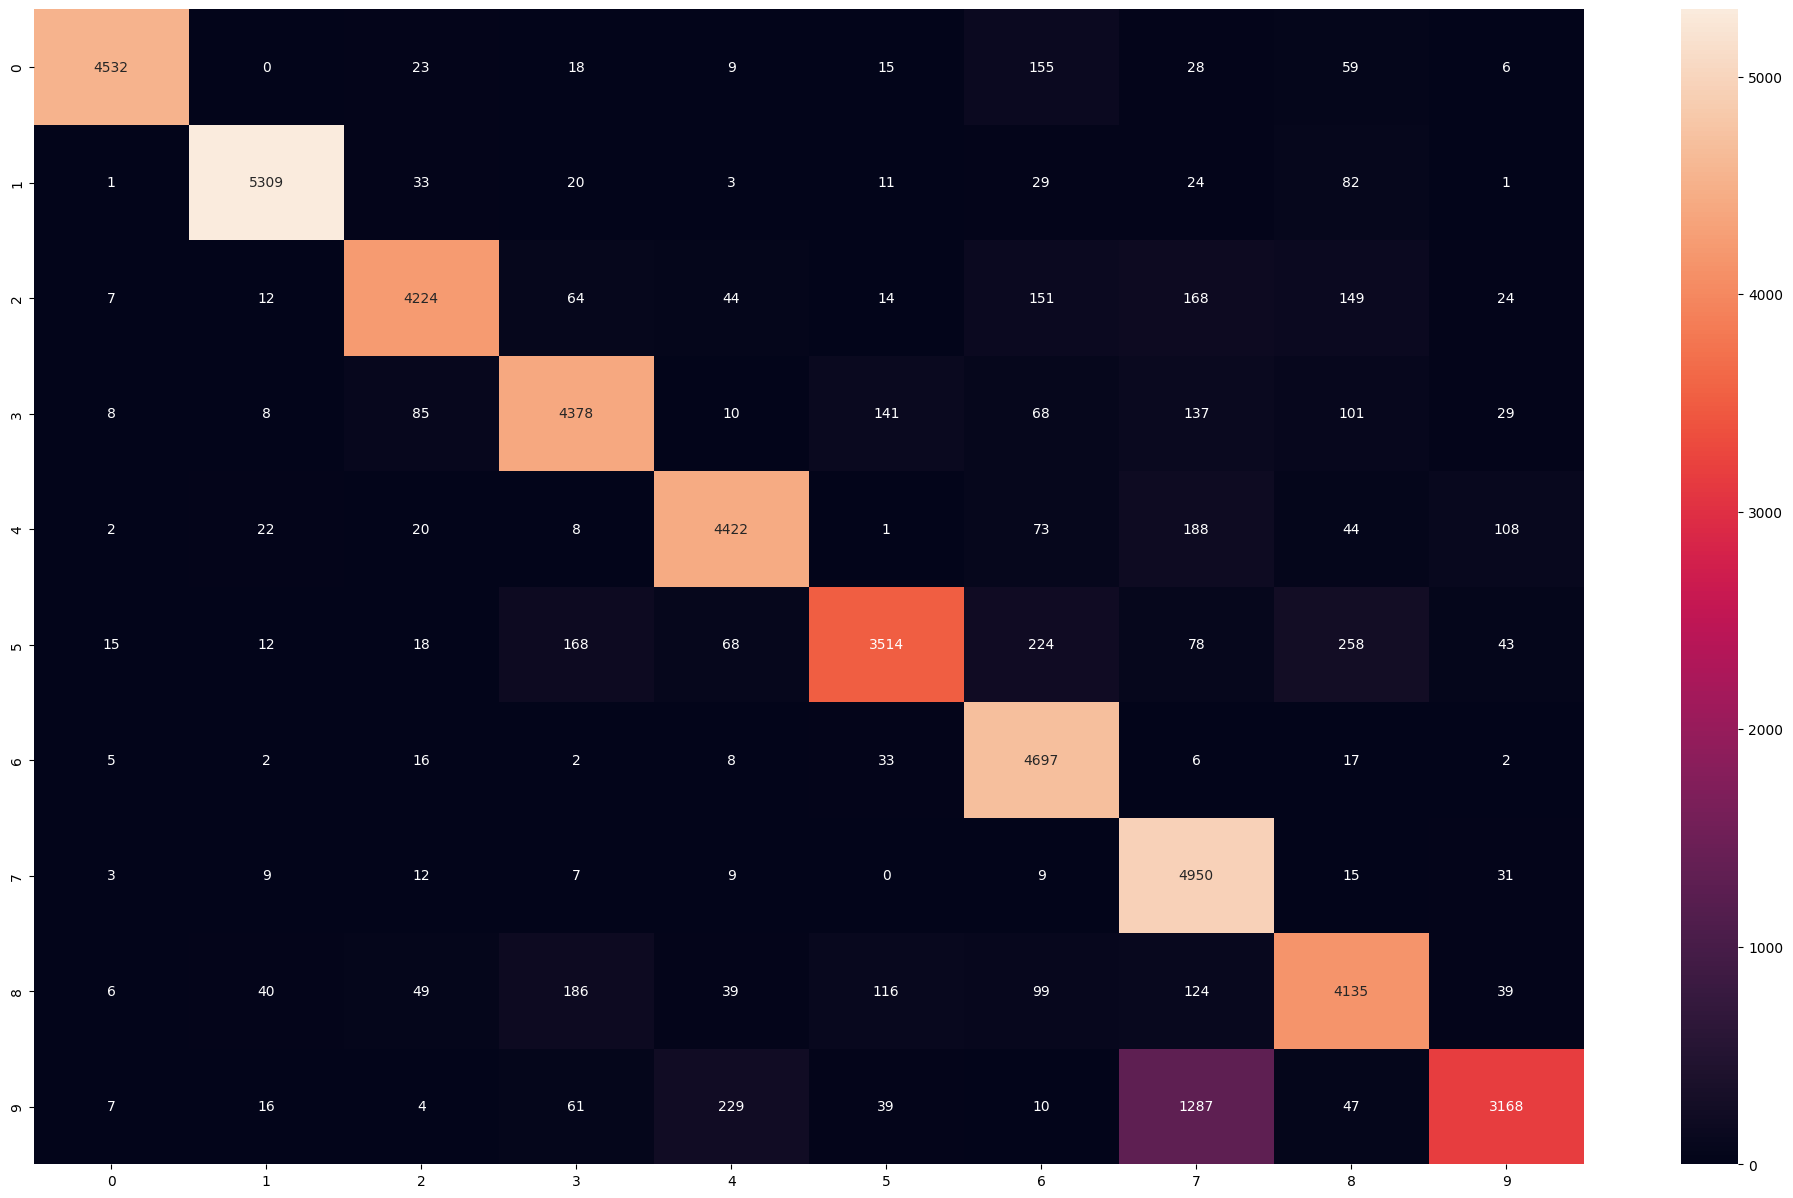

In [49]:
fig, ax = plt.subplots(figsize=(25 ,15))
sns.heatmap(conf_mx, annot=True, fmt = '.0f')

<Axes: >

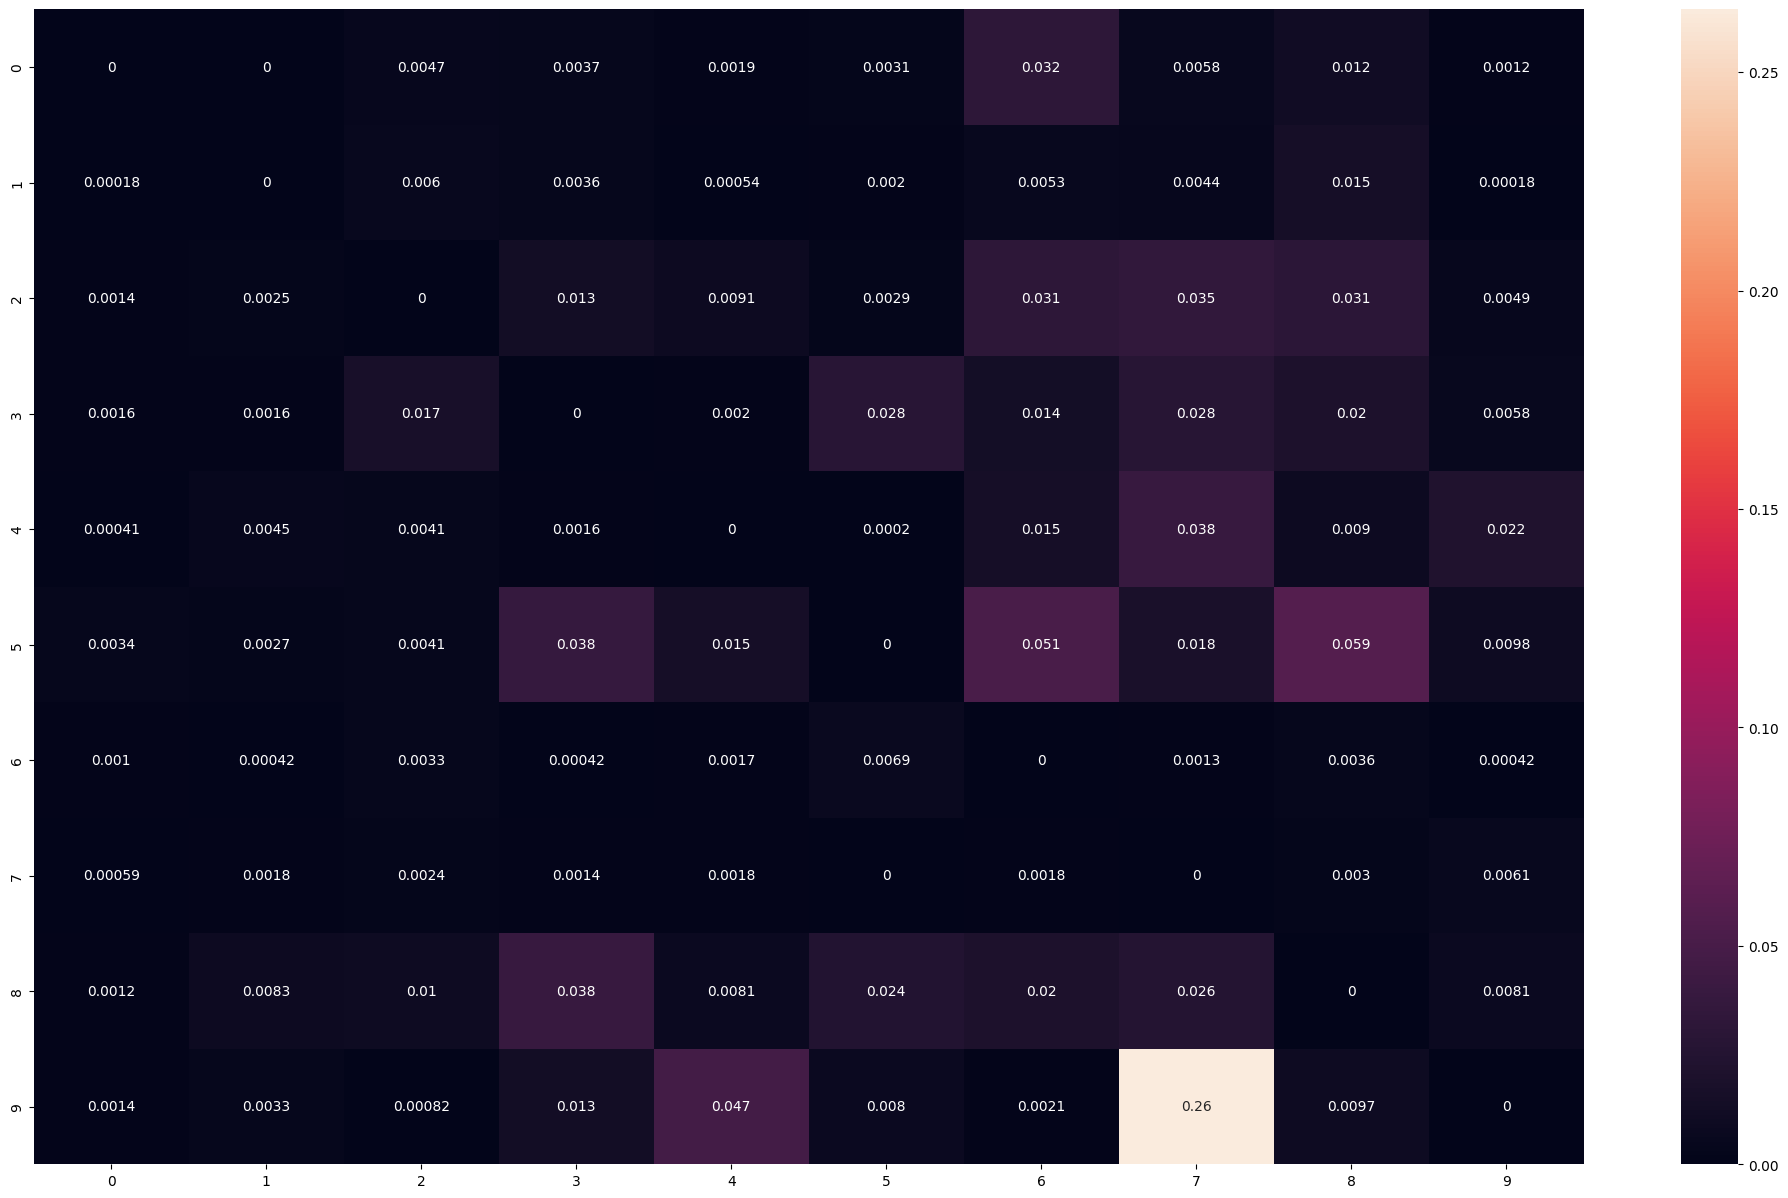

In [54]:
row_sums = conf_mx.sum(axis=1, keepdims=True)
norm_conf_mx = conf_mx/row_sums

np.fill_diagonal(norm_conf_mx, 0)

fig, ax = plt.subplots(figsize=(25 ,15))
sns.heatmap(norm_conf_mx, annot=True)

# Mutilabel 

In [ ]:
# Mutilabel 